DATASET INFO: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes?select=bmw.csv

DATA : https://drive.google.com/file/d/1-6_6kiathX4Uu-9jH-2xPe3V0Zb8y2dB/view?usp=sharing

In [ ]:
!gdown --id 1-6_6kiathX4Uu-9jH-2xPe3V0Zb8y2dB

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-6_6kiathX4Uu-9jH-2xPe3V0Zb8y2dB
To: /content/uk_used_cars.zip
100% 1.15M/1.15M [00:00<00:00, 13.5MB/s]


In [ ]:
!unzip /content/uk_used_cars.zip -d /content/uk_used_cars

Archive:  /content/uk_used_cars.zip
replace /content/uk_used_cars/audi.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/uk_used_cars/bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, train_size = 0.6, random_state = 42)

##Validational sample

In [ ]:
valid, test = train_test_split(test, train_size = .5, random_state=42)

## Features

In [ ]:
train.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [ ]:
X = ['model', 'year',  'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']
cat_features = ['model', 'transmission',  'fuelType']
y = ['price']

##Catboost launch

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor(cat_features = cat_features,
                          eval_metric='MAPE',
                          learning_rate=.08,
                          random_seed=42,
                          verbose = 100)

In [ ]:
model.fit(train[X],
          train[y],
          eval_set = (valid[X], valid[y]))

0:	learn: 0.4564416	test: 0.4521294	best: 0.4521294 (0)	total: 62.7ms	remaining: 1m 2s
100:	learn: 0.0875290	test: 0.0867329	best: 0.0867329 (100)	total: 1.03s	remaining: 9.21s
200:	learn: 0.0760834	test: 0.0779235	best: 0.0779235 (200)	total: 1.67s	remaining: 6.62s
300:	learn: 0.0708670	test: 0.0740290	best: 0.0740290 (300)	total: 3.29s	remaining: 7.63s
400:	learn: 0.0676240	test: 0.0718814	best: 0.0718814 (400)	total: 4.97s	remaining: 7.42s
500:	learn: 0.0654070	test: 0.0709221	best: 0.0708594 (496)	total: 6.98s	remaining: 6.95s
600:	learn: 0.0638577	test: 0.0704606	best: 0.0704490 (599)	total: 8.41s	remaining: 5.58s
700:	learn: 0.0622969	test: 0.0698226	best: 0.0698226 (700)	total: 9.71s	remaining: 4.14s
800:	learn: 0.0609583	test: 0.0694169	best: 0.0694004 (791)	total: 11.2s	remaining: 2.78s
900:	learn: 0.0596089	test: 0.0689968	best: 0.0689945 (895)	total: 12.9s	remaining: 1.42s
999:	learn: 0.0584626	test: 0.0686829	best: 0.0686377 (993)	total: 14.4s	remaining: 0us

bestTest = 0.0

In [ ]:
model.predict(test[X])

array([56789.26848053, 22236.88820676, 13529.70579107, ...,
       29782.42809608, 13799.64166518, 24591.48708124])

In [ ]:
test['price_pred'] = model.predict(test[X])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [ ]:
def error(y_true, y_pred):
  return( mean_absolute_error(y_true, y_pred),
         mean_absolute_percentage_error(y_true, y_pred))

In [ ]:
error(test.price, test.price_pred)

(1537.5600657036578, 0.0724718966452533)

## Learning on the whole dataset

In [ ]:
len(train)

6468

In [ ]:
len(valid)

2156

In [ ]:
len(train) + len(valid)

8624

In [ ]:
train_full = pd.concat([train, valid])

In [ ]:
best_iteration = model.best_iteration_ + 1

In [ ]:
model = CatBoostRegressor(iterations= best_iteration,
                          cat_features = cat_features,

                          eval_metric='MAPE',
                          learning_rate=.08,
                          random_seed=42,
                          verbose = 100)

In [ ]:
model.fit(train_full[X], train_full[y])

0:	learn: 0.4538016	total: 20.9ms	remaining: 20.7s
100:	learn: 0.0854178	total: 1.68s	remaining: 14.9s
200:	learn: 0.0745022	total: 3.6s	remaining: 14.2s
300:	learn: 0.0701717	total: 6.02s	remaining: 13.9s
400:	learn: 0.0676577	total: 7.62s	remaining: 11.3s
500:	learn: 0.0656926	total: 9.56s	remaining: 9.4s
600:	learn: 0.0638104	total: 11.5s	remaining: 7.54s
700:	learn: 0.0624302	total: 13.6s	remaining: 5.7s
800:	learn: 0.0612275	total: 15.3s	remaining: 3.69s
900:	learn: 0.0599823	total: 18.6s	remaining: 1.92s
993:	learn: 0.0590330	total: 20.8s	remaining: 0us


In [ ]:
test['price_predictions_full_data'] = model.predict(test[X])

In [ ]:
error(test.price, test.price_predictions_full_data)

(1512.6160783572977, 0.07305203023986592)

## Changing optimization function

In [ ]:
model = CatBoostRegressor(cat_features = cat_features,
                          loss_function = 'MAE',
                          eval_metric='MAPE',
                          learning_rate=.1,
                          random_seed=42,
                          verbose = 100)

In [ ]:
model.fit(train[X],
          train[y],
          eval_set = (valid[X], valid[y]))

0:	learn: 0.3849345	test: 0.3793341	best: 0.3793341 (0)	total: 36.4ms	remaining: 36.4s
100:	learn: 0.0764009	test: 0.0774578	best: 0.0774578 (100)	total: 1.88s	remaining: 16.7s
200:	learn: 0.0666216	test: 0.0706498	best: 0.0706498 (200)	total: 3.77s	remaining: 15s
300:	learn: 0.0628577	test: 0.0695086	best: 0.0694924 (298)	total: 6.1s	remaining: 14.2s
400:	learn: 0.0605748	test: 0.0687890	best: 0.0687826 (399)	total: 8.07s	remaining: 12.1s
500:	learn: 0.0589764	test: 0.0683467	best: 0.0683222 (490)	total: 10.6s	remaining: 10.6s
600:	learn: 0.0579201	test: 0.0680567	best: 0.0680567 (600)	total: 12.2s	remaining: 8.08s
700:	learn: 0.0570454	test: 0.0678671	best: 0.0678659 (681)	total: 12.8s	remaining: 5.47s
800:	learn: 0.0563072	test: 0.0676018	best: 0.0676018 (800)	total: 13.5s	remaining: 3.35s
900:	learn: 0.0555798	test: 0.0674500	best: 0.0674384 (889)	total: 14.2s	remaining: 1.55s
999:	learn: 0.0548863	test: 0.0673326	best: 0.0672972 (972)	total: 14.8s	remaining: 0us

bestTest = 0.0672

# Model analysis

In [ ]:
test['error'] = test['price_predictions_full_data'] - test['price']
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_predictions_full_data,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,56423.500928,3433.500928
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,22686.544371,-1394.455629
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,13469.047523,470.047523
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,32571.236568,20576.236568
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,34371.930881,4496.930881
...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,14069.400503,-929.599497
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,30077.199361,401.199361
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,30228.466946,-341.533054
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,13797.425007,-1201.574993


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

<Axes: >

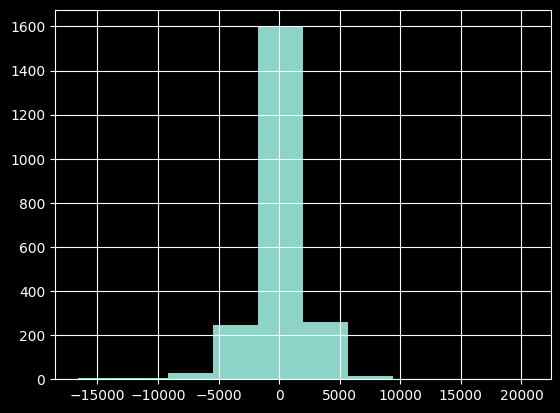

In [ ]:
test.error.hist()

## Absolute error

In [ ]:
test['error_abs'] = abs(test['error'])

In [ ]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_predictions_full_data,error,error_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,56423.500928,3433.500928,3433.500928
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,22686.544371,-1394.455629,1394.455629
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,13469.047523,470.047523,470.047523
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,32571.236568,20576.236568,20576.236568
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,34371.930881,4496.930881,4496.930881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,14069.400503,-929.599497,929.599497
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,30077.199361,401.199361,401.199361
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,30228.466946,-341.533054,341.533054
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,13797.425007,-1201.574993,1201.574993


<Axes: >

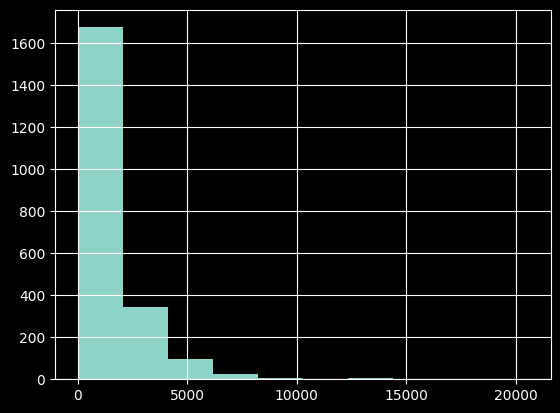

In [ ]:
test.error_abs.hist()

In [ ]:
test.error_abs.describe()

count     2157.000000
mean      1512.616078
std       1669.346241
min          0.160446
25%        487.490053
50%       1033.675725
75%       1917.127320
max      20576.236568
Name: error_abs, dtype: float64

In [ ]:
test.sort_values('error_abs', ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_predictions_full_data,error,error_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,32571.236568,20576.236568,20576.236568
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,30914.816960,-16635.183040,16635.183040
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,86124.332144,15129.332144,15129.332144
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,31119.419707,-13860.580293,13860.580293
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,28727.437444,-13792.562556,13792.562556
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30133.732400,28941.334806,-13553.665194,13553.665194
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46802.901943,46273.759695,-12388.240305,12388.240305
5264,5 Series,2019,38450,Automatic,14522,Diesel,145,62.8,2.0,27529.701294,27207.021725,-11242.978275,11242.978275
9625,5 Series,1996,5995,Automatic,36000,Petrol,270,26.4,2.8,12334.136209,16737.469375,10742.469375,10742.469375
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47193.043921,49426.948377,-10572.051623,10572.051623


In [ ]:
test['price_group'] = pd.qcut(test.price, 5)

In [ ]:
t = test.groupby('price_group')[['error_abs', 'error']].agg(['count','mean'])

In [ ]:
 t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [ ]:
t

,error_abs_count,error_abs_mean,error_count,error_mean
price_group,,,,
"(1199.999, 13995.0]",435,938.628343,435,487.507682
"(13995.0, 18500.0]",432,1124.784279,432,296.290884
"(18500.0, 23131.6]",427,1297.434184,427,136.809809
"(23131.6, 29990.0]",432,1655.529702,432,296.681334
"(29990.0, 74990.0]",431,2550.602124,431,-763.769977


In [ ]:
t.drop('error_count', axis=1)

,error_abs_count,error_abs_mean,error_mean
price_group,,,
"(1199.999, 13995.0]",435,938.628343,487.507682
"(13995.0, 18500.0]",432,1124.784279,296.290884
"(18500.0, 23131.6]",427,1297.434184,136.809809
"(23131.6, 29990.0]",432,1655.529702,296.681334
"(29990.0, 74990.0]",431,2550.602124,-763.769977


In [ ]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [ ]:
t['mean_error'] = test['error_abs'].mean()

In [ ]:
t

,error_abs_count,error_abs_mean,error_count,error_mean,mean_error_diff,mean_error
price_group,,,,,,
"(1199.999, 13995.0]",435,938.628343,435,487.507682,-573.987735,1512.616078
"(13995.0, 18500.0]",432,1124.784279,432,296.290884,-387.831800,1512.616078
"(18500.0, 23131.6]",427,1297.434184,427,136.809809,-215.181894,1512.616078
"(23131.6, 29990.0]",432,1655.529702,432,296.681334,142.913624,1512.616078
"(29990.0, 74990.0]",431,2550.602124,431,-763.769977,1037.986045,1512.616078


In [ ]:
import seaborn as sns

cm = sns.dark_palette("red", as_cmap=True)

t.style.background_gradient(cmap=cm, subset = ['mean_error_diff'])


,error_abs_count,error_abs_mean,error_count,error_mean,mean_error_diff,mean_error
price_group,,,,,,
"(1199.999, 13995.0]",435,938.628343,435,487.507682,-573.987735,1512.616078
"(13995.0, 18500.0]",432,1124.784279,432,296.290884,-387.831800,1512.616078
"(18500.0, 23131.6]",427,1297.434184,427,136.809809,-215.181894,1512.616078
"(23131.6, 29990.0]",432,1655.529702,432,296.681334,142.913624,1512.616078
"(29990.0, 74990.0]",431,2550.602124,431,-763.769977,1037.986045,1512.616078


## Analysis of absolute error dependence with other features

In [ ]:
test

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_predictions_full_data,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,56423.500928,3433.500928,3433.500928,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,22686.544371,-1394.455629,1394.455629,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,13469.047523,470.047523,470.047523,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,32571.236568,20576.236568,20576.236568,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,34371.930881,4496.930881,4496.930881,"(23131.6, 29990.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9627,3 Series,2015,14999,Automatic,78680,Diesel,160,52.3,3.0,14193.617089,14069.400503,-929.599497,929.599497,"(13995.0, 18500.0]"
6096,4 Series,2019,29676,Automatic,7365,Petrol,145,41.5,3.0,30819.807549,30077.199361,401.199361,401.199361,"(23131.6, 29990.0]"
1747,5 Series,2019,30570,Automatic,3067,Hybrid,145,49.6,2.0,29782.428096,30228.466946,-341.533054,341.533054,"(29990.0, 74990.0]"
4023,3 Series,2016,14999,Automatic,70054,Hybrid,0,148.7,2.0,13799.641665,13797.425007,-1201.574993,1201.574993,"(13995.0, 18500.0]"


In [ ]:
t = test.groupby('year')[['error_abs', 'error']].agg(['count','mean'])

In [ ]:
 t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [ ]:
t = t.drop('error_count', axis=1)

In [ ]:
t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()

In [ ]:
t['mean_error'] = test['error_abs'].mean()

In [ ]:
cm = sns.dark_palette("red", as_cmap=True)
t.style.background_gradient(cmap=cm, subset = ['mean_error_diff'])

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,10742.469375,10742.469375,9229.853296,1512.616078
1999,1,3162.215580,3162.215580,1649.599501,1512.616078
2001,1,2607.552278,2607.552278,1094.936199,1512.616078
2002,2,3382.435495,-901.380187,1869.819416,1512.616078
2003,1,460.606490,460.606490,-1052.009589,1512.616078
2004,4,1672.115336,-468.010714,159.499258,1512.616078
2006,3,1568.774331,382.052425,56.158253,1512.616078
2007,2,1373.472397,619.423396,-139.143681,1512.616078
2008,4,1740.537193,1740.537193,227.921114,1512.616078


In [ ]:
 def print_error(col):
  t = test.groupby(col)[['error_abs', 'error']].agg(['count','mean'])
  t.columns = ['_'.join(col).strip() for col in t.columns.values]
  t = t.drop('error_count', axis=1)
  t['mean_error_diff'] = t['error_abs_mean'] - test['error_abs'].mean()
  t['mean_error'] = test['error_abs'].mean()
  cm = sns.dark_palette("red", as_cmap=True)
  display(t.style.background_gradient(cmap=cm, subset = ['mean_error_diff']))

In [ ]:
print_error('transmission')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,695,1464.914709,-29.033793,-47.701369,1512.616078
Manual,504,1064.165835,101.037680,-448.450244,1512.616078
Semi-Auto,958,1783.149872,174.027415,270.533794,1512.616078


In [ ]:
test['engineSize_group'] = pd.cut(test.engineSize, [0, 1.5, 2, float('inf')])
print_error('engineSize_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
engineSize_group,,,,,
"(0.0, 1.5]",279,1125.445602,115.526556,-387.170476,1512.616078
"(1.5, 2.0]",1347,1391.319397,44.894540,-121.296682,1512.616078
"(2.0, inf]",524,2030.905695,204.104382,518.289617,1512.616078


In [ ]:
test['mileage_group'] = pd.qcut(test.mileage, 5)

In [ ]:
print_error('mileage_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4063.2]",432,2335.445397,275.329994,822.829319,1512.616078
"(4063.2, 9825.4]",431,1718.932994,0.444299,206.316916,1512.616078
"(9825.4, 24299.0]",432,1395.229262,19.638666,-117.386817,1512.616078
"(24299.0, 43519.8]",430,1163.178091,46.363803,-349.437988,1512.616078
"(43519.8, 190000.0]",432,949.154465,115.528654,-563.461614,1512.616078


In [ ]:
print_error('fuelType')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
fuelType,,,,,
Diesel,1394,1415.722288,39.890608,-96.893790,1512.616078
Hybrid,64,1527.455464,-383.451415,14.839386,1512.616078
Other,5,1236.542921,-1015.064717,-276.073158,1512.616078
Petrol,694,1707.861884,247.077053,195.245805,1512.616078


In [ ]:
test['tax_group'] = pd.qcut(test.tax, 5, duplicates= 'drop')

In [ ]:
print_error('tax_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",512,852.082567,158.863942,-660.533511,1512.616078
"(125.0, 145.0]",1131,1764.174559,53.065633,251.558481,1512.616078
"(145.0, 150.0]",252,1742.174068,136.718140,229.557990,1512.616078
"(150.0, 580.0]",262,1496.707310,82.649726,-15.908769,1512.616078


In [ ]:
test['mpg_group'] = pd.qcut(test.mpg, 5)

In [ ]:
print_error('mpg_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 42.2]",444,2115.016727,261.756298,602.400649,1512.616078
"(42.2, 50.4]",487,1596.016825,216.107125,83.400747,1512.616078
"(50.4, 55.4]",380,1484.077899,-20.575058,-28.538179,1512.616078
"(55.4, 64.2]",449,1211.828255,-108.680413,-300.787823,1512.616078
"(64.2, 470.8]",397,1104.092625,82.153223,-408.523453,1512.616078


<Axes: xlabel='year'>

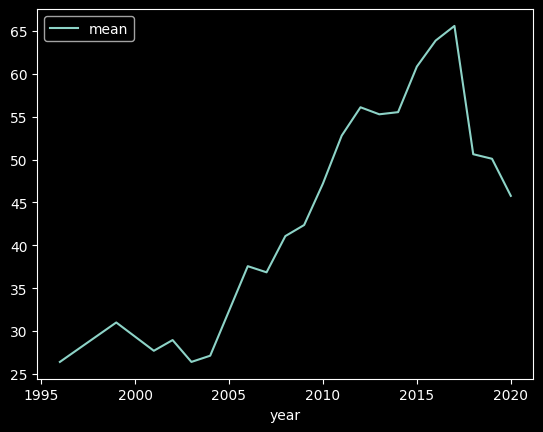

In [ ]:
test.groupby('year')['mpg'].agg(['mean']).plot()

## Feature importance

In [ ]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,engineSize,27.766448
1,model,19.298944
2,year,18.828391
3,mpg,13.523548
4,mileage,10.801385
5,fuelType,4.667984
6,transmission,3.226308
7,tax,1.886992


##Shap

In [ ]:
!pip install shap
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [ ]:
pd.DataFrame(shap_values, columns = X)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,8180.477604,4694.047296,1657.730652,4392.706096,2037.871190,313.032434,7582.943564,7052.543790
1,-9.385082,-245.936889,1117.393508,535.911547,203.391307,145.874095,-1084.811060,-1120.314784
2,-2270.642126,-1898.632551,-34.016362,-4078.143004,-921.609187,115.980078,1646.365651,-776.060567
3,-2714.030360,4819.081833,1179.534315,4234.070879,-1391.809296,83.822502,5628.912400,-1176.351880
4,-1265.289861,5635.744300,1192.113433,5007.942968,-1706.269286,234.836111,2074.897211,-1360.210285
...,...,...,...,...,...,...,...,...
2152,-1484.434555,-3855.694824,-169.357388,-5002.895781,244.658137,91.921835,-564.955177,2408.550972
2153,-2521.498741,4330.047730,-0.203545,1942.624364,-898.431239,206.479464,1131.330712,4037.045868
2154,725.703330,4000.955848,237.203556,3274.233410,1104.901456,480.110814,-813.131972,-1078.199313
2155,-2413.278520,-1719.295339,173.918862,-4064.479170,1762.725416,-880.481275,-1060.574756,-737.159983


In [ ]:
# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], test[X].iloc[0,:])


## TOP 10 errors

In [ ]:
shap_cols = [x + '_shap' for x in X]

In [ ]:
shap_values_df = pd.DataFrame(shap_values, columns = shap_cols)

In [ ]:
test_shap = pd.concat([test.reset_index(), shap_values_df], axis=1)

In [ ]:
test_shap = test_shap.sort_values('error_abs', ascending=False)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values[0,:], test_shap[X].iloc[0,:])


In [ ]:
pd.options.display.max_columns = 100

In [ ]:
test_shap

,index,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,price_predictions_full_data,error,error_abs,price_group,engineSize_group,mileage_group,tax_group,mpg_group,model_shap,year_shap,transmission_shap,mileage_shap,fuelType_shap,tax_shap,mpg_shap,engineSize_shap
3,6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,32571.236568,20576.236568,20576.236568,"(1199.999, 13995.0]","(1.5, 2.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]",-2714.030360,4819.081833,1179.534315,4234.070879,-1391.809296,83.822502,5628.912400,-1176.351880
144,1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,30914.816960,-16635.183040,16635.183040,"(29990.0, 74990.0]","(1.5, 2.0]","(0.999, 4063.2]","(125.0, 145.0]","(55.4, 64.2]",-380.570555,4206.020450,1140.340557,4975.387899,595.441560,257.204645,-1343.816326,-1190.320902
1349,6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,86124.332144,15129.332144,15129.332144,"(29990.0, 74990.0]","(2.0, inf]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]",15692.455554,4365.631181,2368.841895,9116.007396,-1332.435660,187.812719,19837.911856,12030.469450
706,2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,31119.419707,-13860.580293,13860.580293,"(29990.0, 74990.0]","(1.5, 2.0]","(0.999, 4063.2]","(125.0, 145.0]","(55.4, 64.2]",3204.067127,3268.852094,1004.927438,4664.608262,793.562717,148.077887,-1804.554089,-2745.258280
1914,6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,28727.437444,-13792.562556,13792.562556,"(29990.0, 74990.0]","(1.5, 2.0]","(0.999, 4063.2]","(125.0, 145.0]","(64.2, 470.8]",-411.661595,4053.642073,1054.945025,4637.892109,-24.809694,206.776232,-2388.360149,-1253.926148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,6682,X3,2019,33262,Semi-Auto,6792,Diesel,145,54.3,2.0,33392.476524,33257.354578,-4.645422,4.645422,"(29990.0, 74990.0]","(1.5, 2.0]","(4063.2, 9825.4]","(125.0, 145.0]","(50.4, 55.4]",4701.004504,3943.923468,1060.176543,1770.758202,395.295012,165.664035,-339.764105,-1530.545809
657,350,1 Series,2018,23498,Semi-Auto,11131,Petrol,145,39.8,3.0,23189.334684,23496.473464,-1.526536,1.526536,"(23131.6, 29990.0]","(2.0, inf]","(9825.4, 24299.0]","(125.0, 145.0]","(5.499, 42.2]",-4497.604212,-417.561652,1186.258625,958.233394,-856.217525,265.454210,1571.929857,3599.215493
1069,6571,1 Series,2014,11995,Semi-Auto,23000,Petrol,125,50.4,1.6,11557.791574,11994.754622,-0.245378,0.245378,"(1199.999, 13995.0]","(1.5, 2.0]","(9825.4, 24299.0]","(-0.001, 125.0]","(42.2, 50.4]",-2474.555489,-4897.354194,1246.133583,-319.540123,-607.455265,-476.127745,-721.419421,-1934.790609
1930,6673,X4,2019,42995,Automatic,5980,Diesel,145,37.2,3.0,44929.107854,42994.834271,-0.165729,0.165729,"(29990.0, 74990.0]","(2.0, inf]","(4063.2, 9825.4]","(125.0, 145.0]","(5.499, 42.2]",4881.783323,4679.153537,244.042794,3355.948852,991.814673,115.262520,1502.749221,5945.215701


In [ ]:
print_error('model')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
model,,,,,
1 Series,381,1181.037154,73.808564,-331.578924,1512.616078
2 Series,237,1401.369458,228.863577,-111.246620,1512.616078
3 Series,499,1343.348536,71.857706,-169.267542,1512.616078
4 Series,203,1691.453430,2.597308,178.837352,1512.616078
5 Series,216,1544.740238,173.841524,32.124160,1512.616078
6 Series,17,1869.881606,657.093806,357.265527,1512.616078
7 Series,19,2741.954983,-2128.640405,1229.338905,1512.616078
8 Series,4,1804.496801,-1667.656635,291.880723,1512.616078
M2,10,3653.242413,3653.242413,2140.626335,1512.616078


<Axes: >

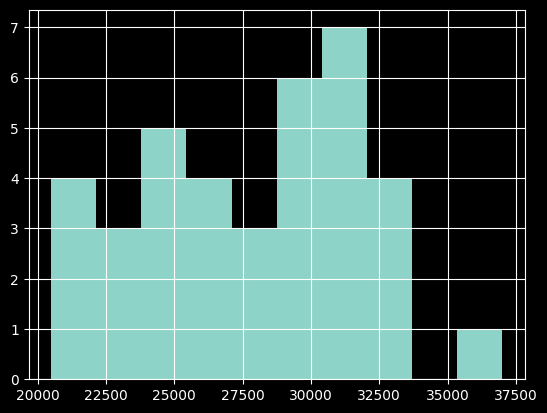

In [ ]:
train.query('model == " 1 Series" and year == 2020').price.hist()

<Axes: >

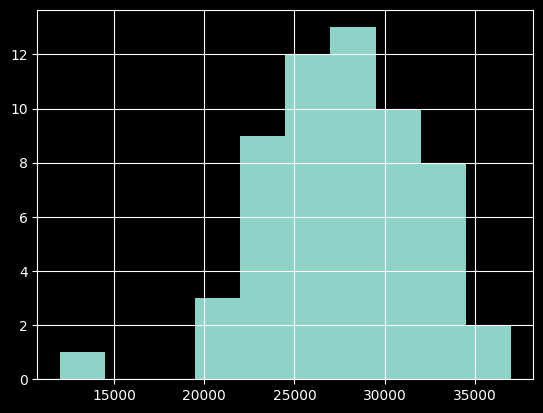

In [ ]:
df.query('model == " 1 Series" and year == 2020').price.hist()

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, test_shap[shap_cols].values, test_shap[X])

## Dependance plot

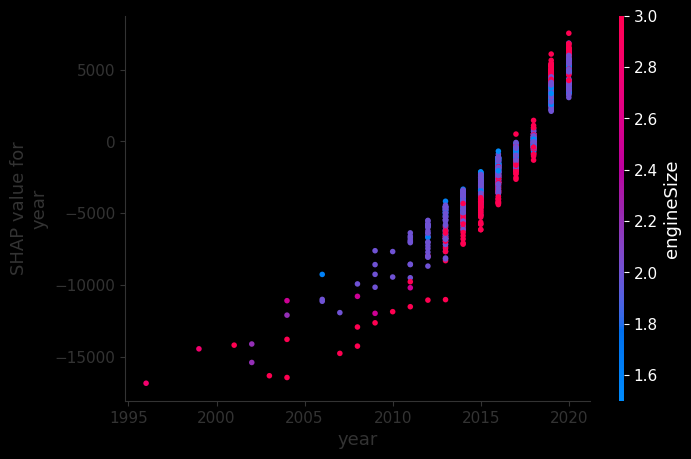

In [ ]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("year", shap_values, test[X])

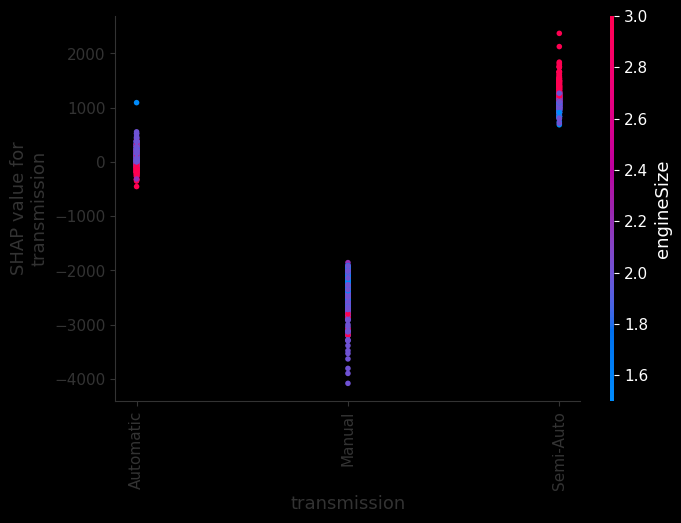

In [ ]:
shap.dependence_plot("transmission", shap_values, test[X])

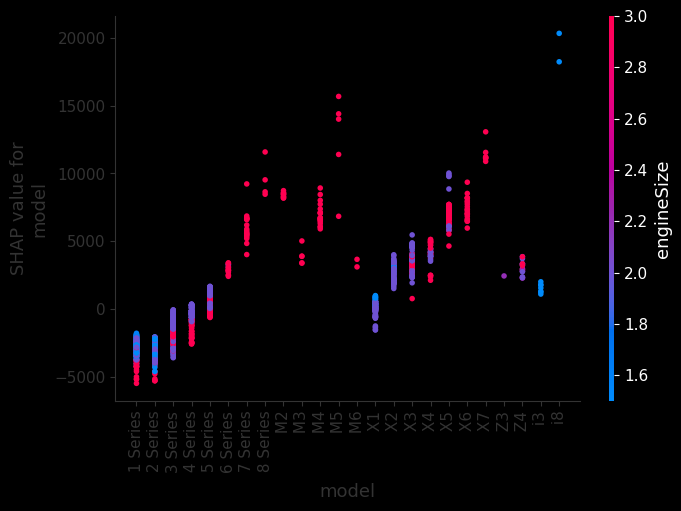

In [ ]:
shap.dependence_plot("model", shap_values, test[X])

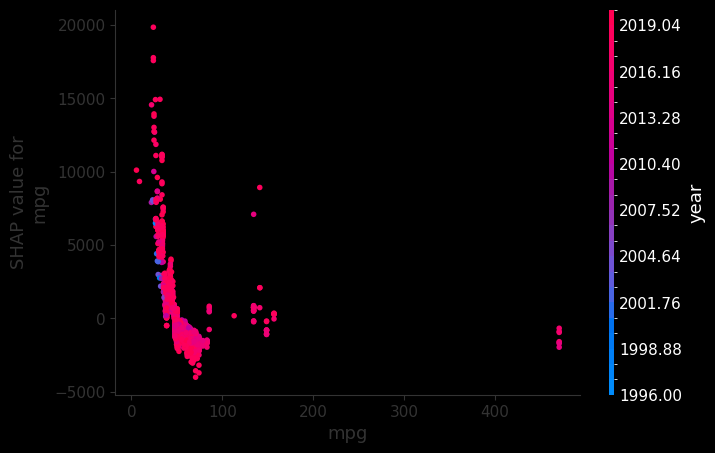

In [ ]:
shap.dependence_plot("mpg", shap_values, test[X])

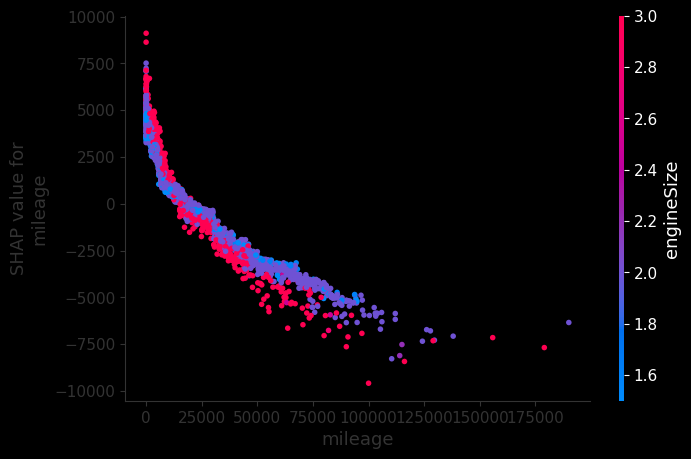

In [ ]:
shap.dependence_plot("mileage", shap_values, test[X])

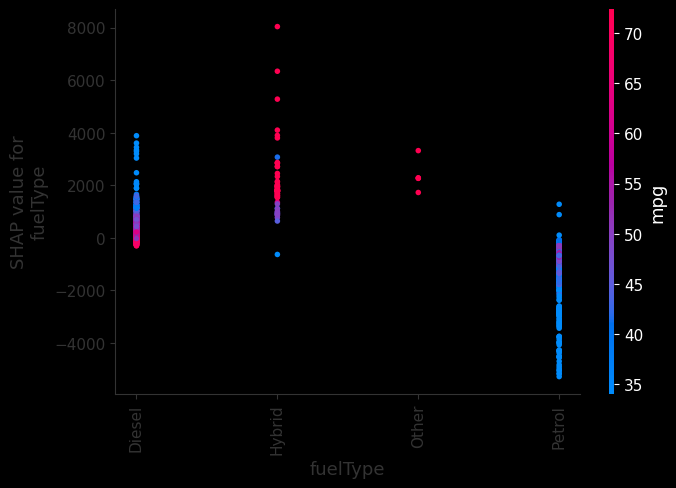

In [ ]:
shap.dependence_plot("fuelType", shap_values, test[X])

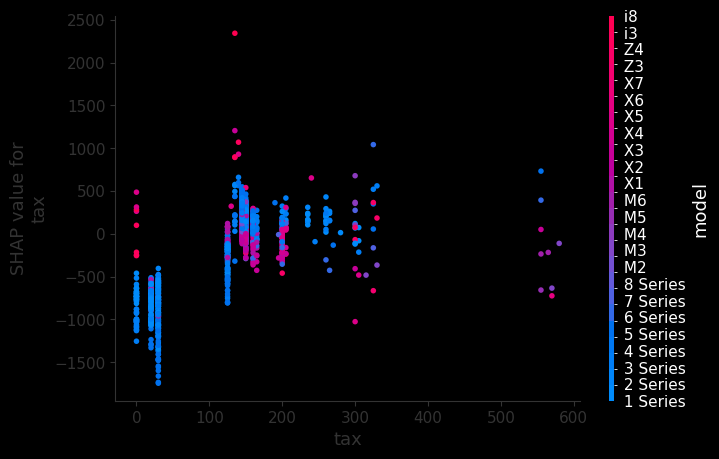

In [ ]:
shap.dependence_plot("tax", shap_values, test[X])

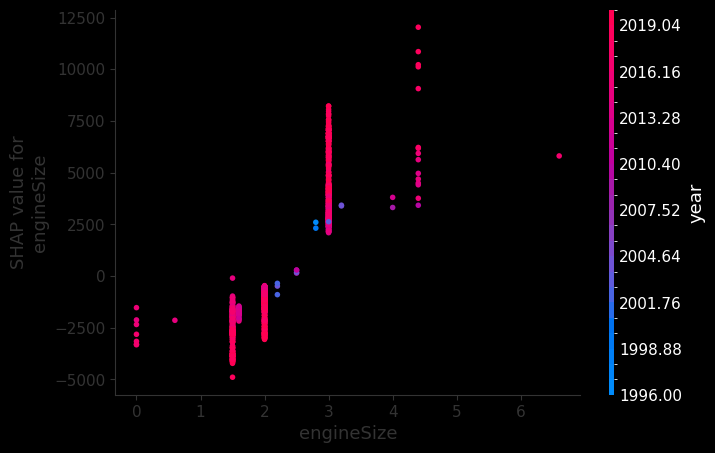

In [ ]:
shap.dependence_plot("engineSize", shap_values, test[X])

## Summary plot

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


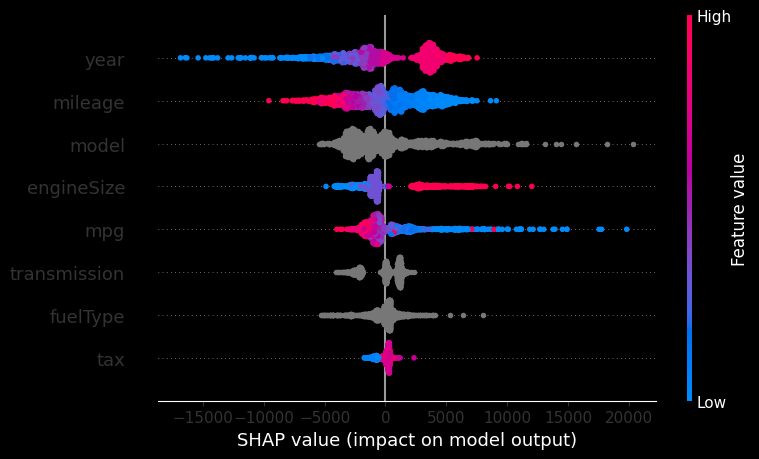

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, test[X])